# Classification of Wheaet Seeds using KNN Algorithm

### Task 1 Develop a machine learning model

In [110]:
## import the DataFrame
import pandas as pd
import numpy as np

wheatData = pd.read_csv('wheatseedsDataset.csv',header=0)
wheatData.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,WheatType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [111]:
## Isolating information from DataFrame for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
wheatData = wheatData.drop(columns=['Compactness'])
wheatData = wheatData.drop(columns=['Asymmetry Coefficient'])
wheatData = wheatData.drop(columns=['Area'])
wheatData = wheatData.drop(columns=['Perimeter'])
wheatData = wheatData.drop(columns=['Length of Kernel Groove'])

classtype = wheatData.WheatType

In [112]:
## using train_test_split to separate the dataframe into training testing arrays
wheatData_train, wheatData_test, classtype_train, classtype_test = train_test_split(wheatData, classtype)

In [113]:
## preprocessing the array into 'normalized' values
##  attributes with minmaxscaler, classes with labelencoder
n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(wheatData_train.to_numpy())
Data_train = n1.transform(wheatData_train.to_numpy())

#Should be unnecessary because our classes are already numerical
#le = preprocessing.LabelEncoder()
#le = le.fit(classtype_train)

In [114]:
## Check for matching instances
print(Data_train.shape)
print(classtype_train.shape)

(157, 3)
(157,)


In [115]:
## Creates the machine learning model where n_neighbors is the number of neighbors that each point will check
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(Data_train, classtype_train)

In [116]:
## Can compare real answers and knn prediction with dataframe
Answers = pd.DataFrame()
Answers['WheatType'] = classtype_test
Answers['Prediction'] = knn.predict(wheatData_test)
Answers.head()

C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,WheatType,Prediction
15,1,2
119,2,2
124,2,2
132,2,2
191,3,2


In [117]:
print('The accuracy value for the testing set was:', knn.score(wheatData_test, classtype_test))
print('The accuracy value for the training set was:', knn.score(wheatData_train, classtype_train))

The accuracy value for the testing set was: 0.33962264150943394
The accuracy value for the training set was: 0.33121019108280253


C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Task 2 Doing analysis to find the best value of k

In [118]:
Accuracy = pd.DataFrame()

## MANUALLY FOUND VALUES FOR ACCURACY
K = []
A = [0.396226,0.377358,0.245283,0.264151,0.415094,0.320755,0.301887,0.283019,0.358491,0.188679,0.339623,0.377358,0.301887,0.339623,0.245283,0.207547,0.339623,0.415094,0.396226,0.264151, 0.320755,0.358491,0.339623,0.377358,0.320755,0.415094,0.320755,0.339623,0.283019,0.320755,0.377358,0.320755,0.301887,0.377358,0.339623,0.377358,0.339623,0.358491,0.396226,0.339623,0.320755,0.358491,0.339623,0.377358,0.358491,0.320755,0.339623,0.377358,0.358491,0.339623,0.358491,0.339623,0.339623]
T = [0.312102,0.318471,0.363057,0.356688,0.305732,0.33758,0.343949,0.350318,0.324841,0.3821660,0.33121,0.318471,0.343949,0.33121,0.363057,0.375796,0.33121,0.305732,0.312102,0.356688,0.33758,0.324841,0.33121,0.318471,0.33758,0.305732,0.33758,0.33121,0.350318,0.33758,0.318471,0.33758,0.343949,0.318471,0.33121,0.318471,0.33121,0.324841,0.312102,0.33121,0.33758,0.324841,0.33121,0.318471,0.324841,0.33758,0.33121,0.318471,0.324841,0.33121,0.324841,0.33121,0.33121]
KN = [KNeighborsClassifier(n_neighbors=1),KNeighborsClassifier(n_neighbors=2),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=4),KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=6),KNeighborsClassifier(n_neighbors=7),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=9),KNeighborsClassifier(n_neighbors=10),KNeighborsClassifier(n_neighbors=11),KNeighborsClassifier(n_neighbors=12),KNeighborsClassifier(n_neighbors=13),KNeighborsClassifier(n_neighbors=14),KNeighborsClassifier(n_neighbors=15),KNeighborsClassifier(n_neighbors=16),KNeighborsClassifier(n_neighbors=17),KNeighborsClassifier(n_neighbors=18),KNeighborsClassifier(n_neighbors=19),KNeighborsClassifier(n_neighbors=20),KNeighborsClassifier(n_neighbors=21),KNeighborsClassifier(n_neighbors=22),KNeighborsClassifier(n_neighbors=23),KNeighborsClassifier(n_neighbors=24),KNeighborsClassifier(n_neighbors=25),KNeighborsClassifier(n_neighbors=26),KNeighborsClassifier(n_neighbors=27),KNeighborsClassifier(n_neighbors=28),KNeighborsClassifier(n_neighbors=29),KNeighborsClassifier(n_neighbors=30),KNeighborsClassifier(n_neighbors=31),KNeighborsClassifier(n_neighbors=32),KNeighborsClassifier(n_neighbors=33),KNeighborsClassifier(n_neighbors=34),KNeighborsClassifier(n_neighbors=35),KNeighborsClassifier(n_neighbors=36),KNeighborsClassifier(n_neighbors=37),KNeighborsClassifier(n_neighbors=38),KNeighborsClassifier(n_neighbors=39),KNeighborsClassifier(n_neighbors=40),KNeighborsClassifier(n_neighbors=41),KNeighborsClassifier(n_neighbors=42),KNeighborsClassifier(n_neighbors=43),KNeighborsClassifier(n_neighbors=44),KNeighborsClassifier(n_neighbors=45),KNeighborsClassifier(n_neighbors=46),KNeighborsClassifier(n_neighbors=47),KNeighborsClassifier(n_neighbors=48),KNeighborsClassifier(n_neighbors=49),KNeighborsClassifier(n_neighbors=50),KNeighborsClassifier(n_neighbors=51),KNeighborsClassifier(n_neighbors=52),KNeighborsClassifier(n_neighbors=53)]
k=1
while k<=53:
    K.append(k)
    k+=1
    
Accuracy['K Value'] = K
Accuracy['Test Data Accuracy'] = A
Accuracy['Train Data Accuracy'] = T
Accuracy['Knn'] = KN

Accuracy.head()

,K Value,Test Data Accuracy,Train Data Accuracy,Knn
0,1,0.396226,0.312102,KNeighborsClassifier(n_neighbors=1)
1,2,0.377358,0.318471,KNeighborsClassifier(n_neighbors=2)
2,3,0.245283,0.363057,KNeighborsClassifier(n_neighbors=3)
3,4,0.264151,0.356688,KNeighborsClassifier(n_neighbors=4)
4,5,0.415094,0.305732,KNeighborsClassifier()


### REPEAT TASK 2 Using StandardScaler() instead of MinMaxScaler()

In [119]:
AccuracySS = pd.DataFrame()
Kst = [1,2,7,12,17,22,27,32,37,42,47,52]
Ast = [0.377358,0.320755,0.301887,0.358491,0.377358,0.358491,0.226415,0.301887,0.433962,0.320755,0.339623,0.320755]
Tst = [0.318471,0.337580,0.343949,0.324841,0.318471,0.324841,0.369427,0.343949,0.299363,0.337580,0.331210,0.337580]
AccuracySS['K Value'] = Kst
AccuracySS['Test Data Accuracy'] = Ast
AccuracySS['Train Data Accuracy'] = Tst
AccuracySS.head()

,K Value,Test Data Accuracy,Train Data Accuracy
0,1,0.377358,0.318471
1,2,0.320755,0.337580
2,7,0.301887,0.343949
3,12,0.358491,0.324841
4,17,0.377358,0.318471


### The results of the different methods are graphed below

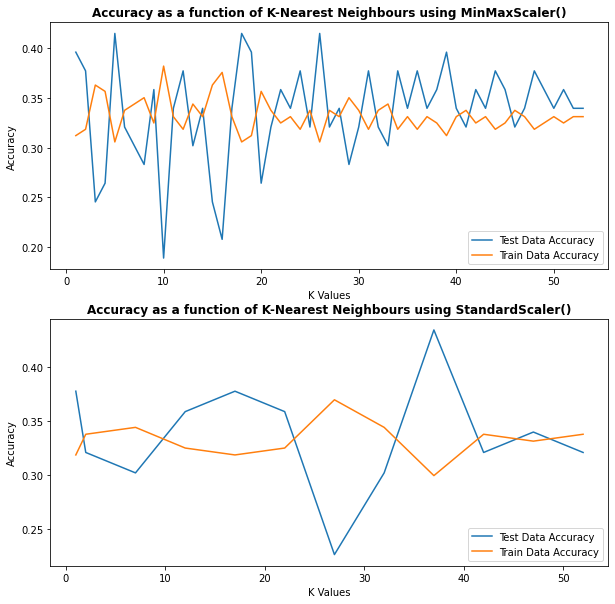

In [120]:
## K-Values can now be plotted as shown below
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,10])
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(Accuracy['K Value'], Accuracy['Test Data Accuracy'], label='Test Data Accuracy')
ax1.plot(Accuracy['K Value'], Accuracy['Train Data Accuracy'], label='Train Data Accuracy')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy as a function of K-Nearest Neighbours using MinMaxScaler()', fontweight='bold')
ax1.legend(loc='lower right')

ax2.plot(AccuracySS['K Value'], AccuracySS['Test Data Accuracy'], label='Test Data Accuracy')
ax2.plot(AccuracySS['K Value'], AccuracySS['Train Data Accuracy'], label='Train Data Accuracy')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy as a function of K-Nearest Neighbours using StandardScaler()', fontweight='bold')
ax2.legend(loc='lower right')


plt.show()

### Task 3 Finding best value of k

In [121]:
#Will use MinMaxScaler() with K-value equivalent to 5
#This provided the greatest accuracy for the test data, 41%, and average accuracy for train data, ~30%.
#Final Model is thus
n1 = preprocessing.MinMaxScaler()
knn = KNeighborsClassifier(n_neighbors=5)

In [122]:
from sklearn.metrics import confusion_matrix
knn = knn.fit(Data_train, classtype_train)
confusion_matrix(classtype_test, knn.predict(wheatData_test))

#print(knn.score(wheatData_test, classtype_test))
#Confusion matrix is a square matrix used to represent how a classification model performs
#Our confusion matrix correctly predicted 'MIDDLE' as Rosa Wheat Seeds 
#   'TOP MIDDLE' Kama incorrectly predicted as Rosa Wheat Seeds
#   'BOTTOM MIDDLE' Canadian incorrectly predicted as Rosa Wheat Seeds
#The classification model only predicting rosa wheat seeds is a limitation of the k-nearest neighbour model

C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[ 0, 20,  0],
       [ 0, 18,  0],
       [ 0, 15,  0]], dtype=int64)

### Task 4 Application of the Model

In [123]:
NewData = pd.DataFrame()
NewData['Length of Kernel'] = [5.230, 5.508, 6.148]
NewData['Width of Kernel'] = [2.854, 3.245, 3.677]
NewData['WheatType'] = [3,1,2]

knn.predict(NewData)
knn.score(NewData, NewData['WheatType'])

C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\liamj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.3333333333333333